In [16]:
!pip install xgboost

    100% |████████████████████████████████| 16.6MB 291kB/s ta 0:00:011  15% |█████                           | 2.6MB 49kB/s eta 0:04:44


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
%matplotlib inline
import seaborn as sns

In [3]:
df1=pd.read_excel('/home/ayushi/Downloads/RE/R1.xlsx',sheet_name='Sheet1', header=1)

In [4]:
df1['Product Line Desc (M)'].unique()

array(['Arresters', 'Bushings', 'Cable Accessories', 'Connectors',
       'Construction', 'Enclosures & Drains', 'Insulators',
       'Safety Products', 'Switching & Fusing', 'Utility Automation',
       'Wire Management', nan], dtype=object)

In [5]:
df1.head()

,Calendar Year Month,Product Line Desc (M),Product Class Desc (M),Sales District Desc (M),ABC indicator,Unnamed: 5,USD,USD.1,USD.2,USD.3,USD.4,USD.5,Unnamed: 12
0,201701,Arresters,#,North East Region,##,0.00,0.0,0.00,0.0,536.34,0.0,0.0,536.34
1,201701,Arresters,Blocks,EuropeMidEastAfrica,B,0.00,0.0,0.00,0.0,23040.00,23040.0,15360.0,61440.00
2,201701,Arresters,Blocks,EuropeMidEastAfrica,C,60588.00,60588.0,0.00,0.0,25486.20,46656.0,190256.0,322986.20
3,201701,Arresters,Blocks,North East Region,C,0.00,0.0,0.00,0.0,5691.00,0.0,0.0,5691.00
4,201701,Arresters,Distribution Arresters,APAC,1,9963.52,0.0,9963.52,0.0,0.00,0.0,0.0,9963.52


In [6]:
arr=['Cable Accessories', 'Connectors','Construction', 'Insulators']

In [7]:
df1 = df1.iloc[:-1] # deleting last row

df1['Calendar Year Month']=pd.to_datetime(df1['Calendar Year Month'],format='%Y%m')
df1['year']=df1['Calendar Year Month'].apply(lambda x: x.year) 
df1['month']=df1['Calendar Year Month'].apply(lambda x: x.month)
df1.drop(['Calendar Year Month'],axis=1,inplace=True)

a=df1[df1['Product Line Desc (M)']=='Cable Accessories']

a['Product Class Desc (M)'].unique()# have to do one hot encoding 

a['Product Line Desc (M)'].unique()#  have to removing this one, because it has one constant 

a.drop(['Product Line Desc (M)'],axis=1,inplace=True)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
a['Sales District Desc (M) '] = le.fit_transform(a['Sales District Desc (M) '])

one_hot1 = pd.get_dummies(a['Product Class Desc (M)'])

one_hot2 = pd.get_dummies(a['ABC indicator'])

a = pd.concat([a, one_hot1], axis=1)

a=pd.concat([a,one_hot2], axis=1)

a.drop(['Product Class Desc (M)','ABC indicator'],axis=1,inplace=True)

/home/ayushi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/ayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [8]:
a.head()

,Sales District Desc (M),Unnamed: 5,USD,USD.1,USD.2,USD.3,USD.4,USD.5,Unnamed: 12,year,month,URD Accessories,URD Arresters,1,A,B,C,D
181,1,2791.66,481.94,2309.72,0.0,0.00,6328.42,0.00,9120.08,2017,1,1,0,0,1,0,0,0
182,1,5512.37,0.00,5512.37,0.0,0.00,0.00,0.00,5512.37,2017,1,1,0,0,0,1,0,0
183,1,0.00,0.00,0.00,0.0,0.00,4015.19,4015.19,8030.38,2017,1,1,0,0,0,0,0,1
184,3,0.00,0.00,0.00,0.0,0.00,0.00,5757.60,5757.60,2017,1,1,0,0,1,0,0,0
185,3,0.00,0.00,0.00,0.0,429.84,0.00,0.00,429.84,2017,1,1,0,0,0,1,0,0


In [9]:
a.dtypes

Sales District Desc (M)       int64
Unnamed: 5                  float64
USD                         float64
USD.1                       float64
USD.2                       float64
USD.3                       float64
USD.4                       float64
USD.5                       float64
Unnamed: 12                 float64
year                          int64
month                         int64
URD Accessories               uint8
URD Arresters                 uint8
1                             uint8
A                             uint8
B                             uint8
C                             uint8
D                             uint8
dtype: object

In [80]:
a.drop(['USD','USD.1','USD.2','USD.3','USD.4','USD.5','Unnamed: 12'],inplace=True,axis=1)

In [81]:
a.head()

,Sales District Desc (M),Unnamed: 5,year,month,URD Accessories,URD Arresters,1,A,B,C,D
181,1,2791.66,2017,1,1,0,0,1,0,0,0
182,1,5512.37,2017,1,1,0,0,0,1,0,0
183,1,0.00,2017,1,1,0,0,0,0,0,1
184,3,0.00,2017,1,1,0,0,1,0,0,0
185,3,0.00,2017,1,1,0,0,0,1,0,0


In [82]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [83]:
Y=a['Unnamed: 5']
a.drop('Unnamed: 5',axis=1,inplace=True)
X=a
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [84]:
model= XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [85]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [10]:
predictions=model.predict(X_test)

NameError: name 'model' is not defined

Text(0,0.5,'Predictions')

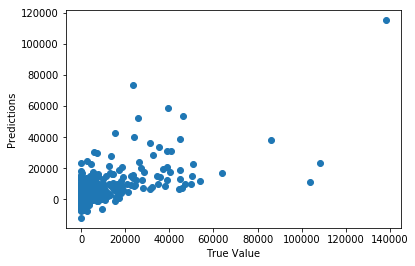

In [87]:
plt.scatter(y_test,predictions)
plt.xlabel('True Value')
plt.ylabel('Predictions')

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
r2_score(y_test,predictions)

0.39044953062492027

In [90]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model,{'max_depth':range(3,10,2),
                         'min_child_weight':range(1,6,2)}
                    )

clf.fit(X_train,y_train)
clf.best_score_, clf.best_params_

(0.18804453748313799, {'max_depth': 3, 'min_child_weight': 5})

In [91]:
from sklearn import linear_model

In [92]:
lm=linear_model.LinearRegression()

model1=lm.fit(X_train, y_train)

In [93]:
predictions1=lm.predict(X_test)

In [94]:
new_pred=(predictions1+predictions)/2

In [95]:
r2_score(y_test,new_pred)

0.3728132089733732

In [131]:
final_pred=0.8*predictions+0.5*predictions1

In [132]:
r2_score(y_test,final_pred)

0.40613356791498856

In [134]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.26553266243721085